## ARIMA MODEL

In this notebook I am exploring the data and some of the items sold in the store, and attempting to fit a time series ARIMA model to one of the items sold. Specifically, I chose ice as an item, expecting to see more seasonal data as people would be more inclined to buy it in the summer. 

I attempted to predict the last 10 days of of the data in regards to the dollars' worth of ice that the store sold.

Unfortunately, since the data is only 13 months old, the model could not grasp seasonal trends eg. every summer more people buy ice. Although it did not make good predictions on a daily basis, regarding how much ice would be sold every one of the last 10 days, overall it did pretty well since around 280 dollars worth of ice was sold in the last 10 days and the model predicted about 290. 

Next steps will be to maybe try out some other items with this model and then soon move on to a recurrent neural network which should be able to yield better results.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#import data
dat = pd.read_csv("./data/sales.csv")
dat2 = pd.read_csv("./data/events.csv")
dat3 = pd.read_csv("./data/weather.csv")

In [4]:
#format Date so that it does not contain hours and set it as index
dat['Date'] = dat['Date'].str[:10]
dat.set_index('Date')

dat3['date'] = dat3['date'].str[:10]
dat3.set_index('date')

print(dat3.shape)

(405, 4)


In [5]:
dat2

,date,event
0,2016-11-06,Football
1,2016-12-04,Football
2,2016-12-11,Football
3,2016-12-24,Football
4,2017-01-08,Football
5,2017-08-10,Football
6,2017-08-31,Football
7,2017-09-10,Football
8,2017-09-24,Football
9,2017-09-28,Football


In [6]:
dat

,Date,POSCode,Description,SalesQuantity,SalesAmount
0,2017-11-30,410,DONUT $1.29,24.0,30.96
1,2017-11-30,621,BANANA,1.0,0.59
2,2017-11-30,972,COFF/TEA 16 OZ,6.0,8.34
3,2017-11-30,973,COFF/TEA 20 OZ,12.0,19.08
4,2017-11-30,974,COFF/TEA 24 OZ,7.0,12.53
5,2017-11-30,988,MUG REFILL REGULAR,3.0,2.97
6,2017-11-30,989,MUG REFIL BB,5.0,3.95
7,2017-11-30,1375,BB MUG,1.0,1.99
8,2017-11-30,1602,GB PRESS,9.0,13.50
9,2017-11-30,1607,JOURNAL DAILY,3.0,6.00


In [7]:
dat.Description.unique()

array(['DONUT $1.29', 'BANANA', 'COFF/TEA 16 OZ', ...,
       'FRITO NUT HARV PRO P', 'GRIZZ LC STRAIGHT PP',
       'BELG BOY CHOCO STIX'], dtype=object)

In [8]:
#items sold the most days
dat['Description'].value_counts().max

<bound method Series.max of SWISHER SWT CIGRLO S    440
MEGA BUCKS              395
DEW  20OZ               395
MARL GOLD               395
COFF/TEA 16 OZ          394
COFF/TEA 24 OZ          394
COFF/TEA 20 OZ          393
MON REGULAR 16OZ        392
GRIZZLY LC WINTERGRE    386
RED BULL 12OZ           386
MARL FF                 386
DT COKE 20OZ            382
NEWP NON MEN 100        381
COKE 20OZ               380
DT DEW 20OZ             380
NEWP MEN                376
NEWP MEN 100            362
PEPSI  20OZ             358
CAMEL MEN SILVER        358
MELLO YELLO 20OZ        356
MON GREEN XXL           354
MARL SILVER             345
GB PRESS                344
DEW CAN                 343
BIC MINI LIGHTER        342
ICE 7LB BAG             341
MON ZERO ULT 16OZ       339
JOURNAL DAILY           338
RED BULL 8 3OZ          338
MUG REFILL REGULAR      337
                       ... 
USA TODAY WEDNESDAY       1
PKR MINI HELMET           1
CASTACHIOS ZESTY SAL      1
CHAP-ICE LIP BALM GR

In [9]:
#drop information that is not needed
df = dat.drop(['POSCode', 'SalesAmount'], axis = 1)

In [10]:
# bananas = df.loc[df['Description'] == 'BANANA']
# bananas = bananas.drop(['Description'], axis = 1)
# bananas

# smartwater = df.loc[df['Description'] == 'SMART WATER 700ML']
# smartwater = smartwater.drop(['Description'], axis = 1)
# smartwater
#---------------------------------------------------------


#In the future the item in question will be passed in instead of hard coded.

item = df.loc[df['Description'] == 'DEW  20OZ']
item = item.drop(['Description'], axis = 1)

#Convert the date to proper datetime format
item['Date'] = pd.to_datetime(item['Date'],format='%Y-%m-%d')

#add days of the week
item['weekday'] = item['Date'].dt.dayofweek
# print(item)

#flip dataframe upside down
item = item.iloc[::-1]
#one hot encode days
item= pd.get_dummies(item, columns=['weekday'], prefix=['weekday'])

# print(item)
item = item.set_index('Date')
# item.index

print(item)

            SalesQuantity  weekday_0  weekday_1  weekday_2  weekday_3  \
Date                                                                    
2016-11-01           15.0          0          1          0          0   
2016-11-02           15.0          0          0          1          0   
2016-11-03           14.0          0          0          0          1   
2016-11-04           18.0          0          0          0          0   
2016-11-05           12.0          0          0          0          0   
2016-11-06           13.0          0          0          0          0   
2016-11-07           29.0          1          0          0          0   
2016-11-08           14.0          0          1          0          0   
2016-11-09           11.0          0          0          1          0   
2016-11-10            9.0          0          0          0          1   
2016-11-11           22.0          0          0          0          0   
2016-11-12           25.0          0          0    

In [11]:
#convert football games to datetime format
dat2['Date'] = pd.to_datetime(dat2['date'],format='%Y-%m-%d')
dat2 = dat2.set_index('Date')
events = dat2.drop(['date'], axis = 1)

#concatenate with football events
result = pd.concat([item, events], axis=1, ignore_index=True)


In [12]:
#change NA values to 0.
result = result.fillna(0)
np.mean(result[0])



11.795454545454545

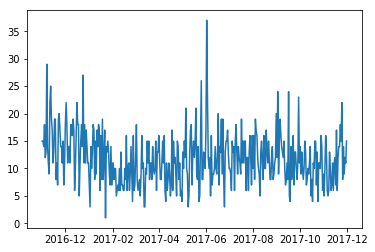

In [13]:

#plot ice sales
plt.plot(item['SalesQuantity'])
# plt.set_xticklabels(item['Date'], rotation=0)

In [14]:
#this dickey fuller test checks stationarity of the time series in order to fit an ARIMA model
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


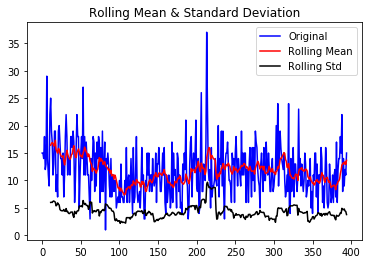

Results of Dickey-Fuller Test:
Test Statistic                  -3.248720
p-value                          0.017332
#Lags Used                      14.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64


In [15]:
#Run test
item
item_values = item['SalesQuantity'].values
test_stationarity(item_values)

## ARIMA

In [16]:


#split into training and testing
X = item_values
forecast_length = 10
train_size = len(X) - forecast_length
train, test = X[0:train_size], X[train_size:]
test


array([14., 18., 15., 22.,  8., 14.,  9., 12., 11., 15.])

In [17]:
#find the best 
def arimaGridSearch(dataset, p_values, d_values, q_values):
    bestrmse = 100
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit()
                    predict = model_fit.forecast(steps=forecast_length)[0]
                    rmse = np.sqrt(mean_squared_error(test, predict))
                    print(order, " ", rmse)
                    if rmse < bestrmse:
                        bestrmse = rmse
                        bestorder = order
                except:
                    continue
    print("Best Overall: ", bestorder, bestrmse)
    return bestorder

In [18]:
#find best model for predictions
warnings.filterwarnings("ignore")
bestorder = arimaGridSearch(item_values,[1,2,3,4,5],[0,1,2,3],[0,1,2,3,4,5])

(1, 0, 0)   4.403587914875104
(1, 0, 1)   5.094098259994364
(1, 0, 2)   5.05863599713133
(1, 1, 0)   3.9508647851722456
(1, 1, 1)   5.554526602247173
(1, 1, 2)   5.565422037640252
(1, 1, 3)   5.960397106009016
(1, 2, 0)   24.1985512085899
(2, 0, 0)   4.378254343383847
(2, 0, 1)   5.056471620132089
(2, 0, 2)   5.127411251527402
(2, 1, 0)   4.3370144394608054
(2, 1, 1)   5.601936887136874
(2, 1, 2)   5.971572022302071
(2, 1, 3)   5.413211628039545
(2, 1, 4)   5.960821900016904
(2, 2, 0)   7.809743121736749
(3, 0, 0)   4.381391055794049
(3, 0, 1)   5.106443292572743
(3, 0, 2)   5.083650870922936
(3, 0, 3)   4.924896303824363
(3, 1, 0)   4.305935215929093
(3, 1, 1)   5.668202671565922
(3, 1, 2)   5.79438242039138
(3, 1, 4)   5.6358405295213245
(3, 2, 0)   8.012930879557812
(4, 0, 0)   4.387449469311926
(4, 0, 1)   5.17846692925707
(4, 0, 2)   5.134974503977731
(4, 0, 3)   4.902854745764835
(4, 0, 4)   5.056705031719841
(4, 1, 0)   4.406623948314012
(4, 1, 1)   5.766906182723979
(4, 1, 2)  

0    13.102873
1    13.496459
2    13.315013
3    13.389753
4    13.350358
5    13.361812
6    13.350612
7    13.349504
8    13.343900
9    13.340300
dtype: float64
3.9508647851722456


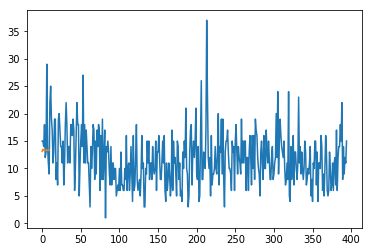

In [19]:
#(1,1,0) Seems to be the best prediction overall
model = ARIMA(train, bestorder)
model_fit = model.fit()

predict = model_fit.forecast(steps=forecast_length)[0]

# compute the error
rmse = np.sqrt(mean_squared_error(test, predict))

# plot the actual data plus forecast
predicted = pd.Series(predict)
print(predicted)
# ice_values.plot()
plt.plot(item_values)
# predicted.plot(color="red")
plt.plot(predicted)

print(rmse)

## MACHINE LEARNING

In [20]:

item.shape

dates = item.index.values

X = item.values



In [21]:
#Function that turns the time series into a supervised problem

def make_supervised(item):
    df = DataFrame(item)
    
    columns = [df.shift(i) for i in range(1,2)]
    columns.append(df)
    
    df = concat(columns,axis=1)
    
    df.fillna(0, inplace=True)
    print(df)
    return(df)

data = make_supervised(X)

        0    1    2    3    4    5    6    7     0    1    2    3    4    5  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  15.0  0.0  1.0  0.0  0.0  0.0   
1    15.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  15.0  0.0  0.0  1.0  0.0  0.0   
2    15.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  14.0  0.0  0.0  0.0  1.0  0.0   
3    14.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  18.0  0.0  0.0  0.0  0.0  1.0   
4    18.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  12.0  0.0  0.0  0.0  0.0  0.0   
5    12.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  13.0  0.0  0.0  0.0  0.0  0.0   
6    13.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  29.0  1.0  0.0  0.0  0.0  0.0   
7    29.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  14.0  0.0  1.0  0.0  0.0  0.0   
8    14.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  11.0  0.0  0.0  1.0  0.0  0.0   
9    11.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   9.0  0.0  0.0  0.0  1.0  0.0   
10    9.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  22.0  0.0  0.0  0.0  0.0  1.0   
11   22.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  25.0  

In [108]:

X = data.iloc[:,0:8].values
y = data.iloc[:,8].values


# print(X)

In [109]:
#Break into training and testing data

X_train = X[:385]
print(X_train.shape)
X_test = X[385:]
print(X_test.shape)


# X_test
y_train = y[:385]
y_test = y[385:]
predicted_dates = dates[385:]



(385, 8)
(10, 8)


In [110]:
from sklearn import linear_model
from sklearn import svm

#ridge regression
clf1 = linear_model.Ridge(alpha=0.6, normalize=True)  
clf1.fit(X_train,y_train)

#suppor vector machine regression
clf2 = svm.SVR()
clf2.fit(X_train,y_train)

predicts_rrg = clf1.predict(X_test)
# predicts_svm = clf2.predict(X_test)

print('{')
for i in range(10):
    print('"' + str(predicted_dates[i]) + '":', predicts_rrg[i], ',')
print('}')

{
"2017-11-21T00:00:00.000000000": 11.290826091909338 ,
"2017-11-22T00:00:00.000000000": 11.3962891630067 ,
"2017-11-23T00:00:00.000000000": 12.662367966521801 ,
"2017-11-24T00:00:00.000000000": 14.079882604698547 ,
"2017-11-25T00:00:00.000000000": 13.737258647825115 ,
"2017-11-26T00:00:00.000000000": 9.910531108225802 ,
"2017-11-27T00:00:00.000000000": 11.509703266480464 ,
"2017-11-28T00:00:00.000000000": 10.813126564024564 ,
"2017-11-29T00:00:00.000000000": 11.205209351852789 ,
"2017-11-30T00:00:00.000000000": 11.993588627483115 ,
}


In [48]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(predicts_rrg,y_test)))
print(np.sqrt(mean_squared_error(predicts_svm,y_test)))

4.307774309649109
4.508505203019309


## AVERAGE LAST 10 DAYS

In [28]:
last10 = X.loc[370:380,0]
print(last10)
average = np.mean(last10)

predicts_avg = [average]*10
print(predicts_avg)
np.sqrt(mean_squared_error(predicts_avg,y_test))

370     6.0
371     5.0
372     6.0
373    13.0
374    10.0
375     6.0
376     7.0
377    11.0
378     6.0
379    11.0
380    12.0
Name: 0, dtype: float64
[8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455, 8.454545454545455]


6.643333824031474

## NEURAL NETWORK

In [284]:
import tensorflow as tf

n_inputs = 8  # MNIST
n_hidden1 = 100
n_hidden2 = 100
n_hidden3 = 30
n_hidden4 = 10
n_outputs = 1
learning_rate = 0.001


In [285]:
tf.reset_default_graph()


X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None), name="y")

# X = tf.constant(X_train, dtype=tf.float32, name="X")
# y = tf.constant(y_train, dtype=tf.float32, name="y")

In [286]:

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.elu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.elu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",
                              activation=tf.nn.elu)
    hidden4 = tf.layers.dense(hidden3, n_hidden4, name="hidden4",
                              activation=tf.nn.elu)
    results = tf.layers.dense(hidden4, n_outputs, name="outputs")

In [287]:
with tf.name_scope("loss"):
    results = tf.squeeze(results)
    mse = tf.losses.mean_squared_error(y,results)
#     xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
#     loss = tf.reduce_mean(xentropy, name="loss")
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(mse)

In [288]:
init = tf.global_variables_initializer()

n_epochs = 100000
# n_batches = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        if epoch % 500 == 0:
                sess.run(training_op, feed_dict={X: X_train, y: y_train})
                print("Epoch", epoch, "MSE =", np.sqrt(mse.eval(feed_dict={X: X_test, y: y_test})))
                                

#                 sess.run(training_op)

Epoch 0 MSE = 9.611496
Epoch 500 MSE = 7.0391464
Epoch 1000 MSE = 5.330931
Epoch 1500 MSE = 5.0058117
Epoch 2000 MSE = 5.0062833
Epoch 2500 MSE = 4.987709
Epoch 3000 MSE = 4.973411
Epoch 3500 MSE = 4.958318
Epoch 4000 MSE = 4.9430785
Epoch 4500 MSE = 4.927249
Epoch 5000 MSE = 4.912112
Epoch 5500 MSE = 4.898382
Epoch 6000 MSE = 4.886115
Epoch 6500 MSE = 4.874184
Epoch 7000 MSE = 4.8624115
Epoch 7500 MSE = 4.851202
Epoch 8000 MSE = 4.8404803
Epoch 8500 MSE = 4.83011
Epoch 9000 MSE = 4.8199778
Epoch 9500 MSE = 4.8100796
Epoch 10000 MSE = 4.8003893
Epoch 10500 MSE = 4.7907815
Epoch 11000 MSE = 4.781325
Epoch 11500 MSE = 4.7719736
Epoch 12000 MSE = 4.7627225
Epoch 12500 MSE = 4.75357
Epoch 13000 MSE = 4.744544
Epoch 13500 MSE = 4.735622
Epoch 14000 MSE = 4.7268233
Epoch 14500 MSE = 4.7181277
Epoch 15000 MSE = 4.709558
Epoch 15500 MSE = 4.7011228
Epoch 16000 MSE = 4.6928134
Epoch 16500 MSE = 4.684626
Epoch 17000 MSE = 4.6765656
Epoch 17500 MSE = 4.668638
Epoch 18000 MSE = 4.6608458
Epoch 185

In [289]:
type(y_train)

numpy.ndarray